In [84]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

animelist = pd.read_csv('DataSets/Cleaned data/data_cleaned_tv_only.csv')
animelist.head()

,title,type,source,episodes,status,airing,rating,score,scored_by,rank,...,Related_Side story,Related_Alternative version,Related_Prequel,Related_Summary,Related_Other,Related_Spin-off,Related_Alternative setting,Related_Character,Related_Parent story,Related_Full story
0,Inu x Boku SS,TV,Manga,12,Finished Airing,False,PG-13 - Teens 13 or older,7.63,139250,1274.0,...,0,0,0,0,0,0,0,0,0,0
1,Seto no Hanayome,TV,Manga,26,Finished Airing,False,PG-13 - Teens 13 or older,7.89,91206,727.0,...,1,1,0,0,0,0,0,0,0,0
2,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,PG - Children,7.55,37129,1508.0,...,0,0,1,0,0,0,0,0,0,0
3,Princess Tutu,TV,Original,38,Finished Airing,False,PG-13 - Teens 13 or older,8.21,36501,307.0,...,0,0,0,1,0,0,0,0,0,0
4,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,PG-13 - Teens 13 or older,8.67,107767,50.0,...,0,0,2,0,1,0,0,0,0,0


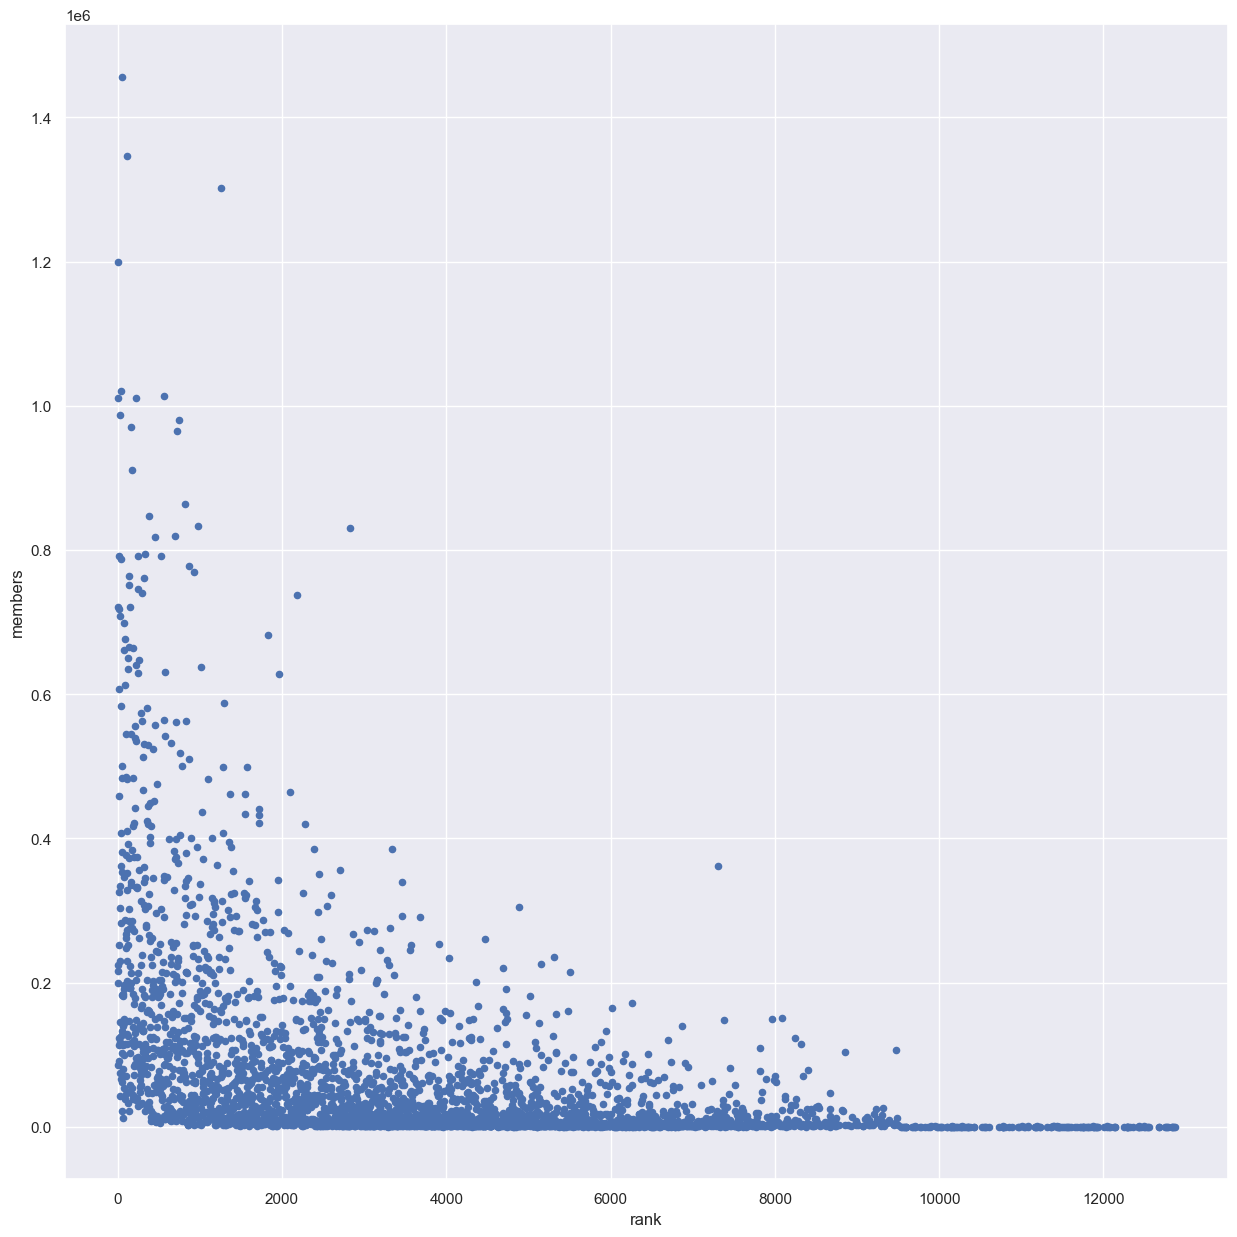

In [85]:
ax1 = animelist.plot.scatter(x='rank', y='members', figsize=(15,15))

{'whiskers': [<matplotlib.lines.Line2D at 0x180ee553c90>,
 'caps': [<matplotlib.lines.Line2D at 0x180ee52ead0>,
 'boxes': [<matplotlib.lines.Line2D at 0x180ee550490>],
 'medians': [<matplotlib.lines.Line2D at 0x180ee52e250>],
 'fliers': [<matplotlib.lines.Line2D at 0x180ee52e0d0>],
 'means': []}

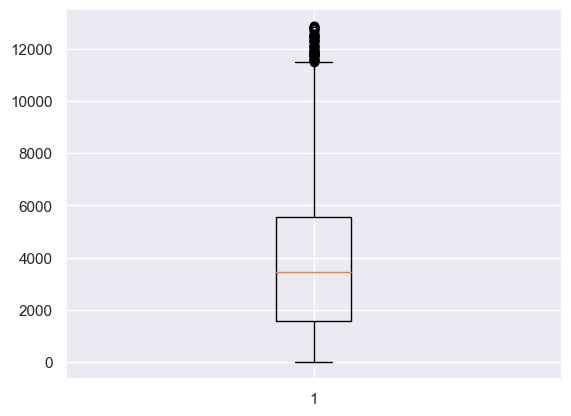

In [110]:
plt.boxplot(animelist['rank'])

In [103]:

# Calculate percentiles for rank and favorites columns
rp = [0.3, 0.5, 0.7]
fp = [0.7, 0.5, 0.1]
rank_percentile_values = animelist['rank'].quantile(rp)
favorites_percentile_values = animelist['members'].quantile(fp)

# Define function to categorize data
def categorize(row):
    if row['rank'] < rank_percentile_values[rp[0]] and row['members'] > favorites_percentile_values[fp[0]]:
        return 1
    elif rank_percentile_values[rp[0]] < row['rank'] < rank_percentile_values[rp[1]] and favorites_percentile_values[fp[1]] < row['members'] < favorites_percentile_values[fp[0]]:
        return 2
    elif rank_percentile_values[rp[1]] < row['rank'] < rank_percentile_values[rp[2]] and favorites_percentile_values[fp[2]] < row['members'] < favorites_percentile_values[fp[1]]:
        return 3
    elif row['rank'] < rank_percentile_values[rp[2]]:
        return 4
    else:
        return 5
    # Add more conditions for other categories

# Apply categorization function to create a new column
animelist['success'] = animelist.apply(categorize, axis=1)

success = pd.DataFrame(animelist[['title','success']])

In [104]:
success.groupby(["success"]).count()

,title
success,
1,633
2,180
3,376
4,1128
5,993


In [105]:
# check percentage of anime in the success 1 category (we want close to 20%)
animelist[(animelist['success'] == 1)].shape[0]/success.shape[0]*100

19.123867069486405

In [113]:
animelist.to_csv('DataSets/Cleaned data/data_cleaned_tv_only.csv', index=False) 

# Checking the animes in different success categories

In [114]:
top = animelist[ (animelist['success'] == 1) ].sort_values(by=['rank','members'], ascending=[True,False])
top.head(20)

,title,type,source,episodes,status,airing,rating,score,scored_by,rank,...,Related_Alternative version,Related_Prequel,Related_Summary,Related_Other,Related_Spin-off,Related_Alternative setting,Related_Character,Related_Parent story,Related_Full story,success
683,Fullmetal Alchemist: Brotherhood,TV,Manga,64,Finished Airing,False,R - 17+ (violence & profanity),9.25,733592,1.0,...,1,0,0,0,1,0,0,0,0,1
372,Gintama°,TV,Manga,51,Finished Airing,False,R - 17+ (violence & profanity),9.15,71751,3.0,...,0,2,0,0,0,0,0,0,0,1
1497,Steins;Gate 0,TV,Visual novel,23,Currently Airing,True,PG-13 - Teens 13 or older,9.15,26739,4.0,...,0,1,0,1,0,1,0,0,0,1
781,Steins;Gate,TV,Visual novel,24,Finished Airing,False,PG-13 - Teens 13 or older,9.14,563857,5.0,...,1,0,0,1,0,4,0,0,0,1
2168,Gintama&#039;,TV,Manga,51,Finished Airing,False,PG-13 - Teens 13 or older,9.11,92025,7.0,...,1,1,0,0,0,0,1,0,0,1
151,Hunter x Hunter (2011),TV,Manga,148,Finished Airing,False,PG-13 - Teens 13 or older,9.11,403377,8.0,...,4,0,0,0,0,0,0,0,0,1
382,3-gatsu no Lion 2nd Season,TV,Manga,22,Finished Airing,False,PG-13 - Teens 13 or older,9.10,30779,9.0,...,0,1,0,0,0,0,0,0,0,1
1408,Gintama&#039;: Enchousen,TV,Manga,13,Finished Airing,False,PG-13 - Teens 13 or older,9.07,63468,10.0,...,0,1,0,0,0,0,0,0,0,1
1619,Owarimonogatari 2nd Season,TV,Light novel,7,Finished Airing,False,R - 17+ (violence & profanity),9.02,42842,13.0,...,0,2,1,0,0,0,0,0,0,1
2603,Gintama.,TV,Manga,12,Finished Airing,False,PG-13 - Teens 13 or older,9.02,40441,13.0,...,0,1,0,0,0,0,0,0,0,1


Indeed, all popular shows. Some top ranking entries are not in success 1 either due to lack of 'members' or due to it not being a TV type

In [107]:
bottom = animelist[ (animelist['success'] == 5) ].sort_values(by=['rank','members'], ascending=[True,False])
bottom.head(20)

,title,type,source,episodes,status,airing,rating,score,scored_by,rank,...,Related_Alternative version,Related_Prequel,Related_Summary,Related_Other,Related_Spin-off,Related_Alternative setting,Related_Character,Related_Parent story,Related_Full story,success
1203,Ginga Patrol PJ,TV,Unknown,26,Finished Airing,False,G - All Ages,6.63,200,5061.0,...,0,0,0,1,0,0,0,0,0,5
2135,Gregory Horror Show: The Last Train,TV,Original,26,Finished Airing,False,G - All Ages,6.63,326,5063.0,...,0,1,0,0,0,0,0,0,0,5
1604,Glass no Kantai: La Legende du Vent de l&#039;...,TV,Original,24,Finished Airing,False,PG-13 - Teens 13 or older,6.63,2550,5063.0,...,0,0,0,0,0,0,0,0,0,5
2633,Honto ni Atta! Reibai Sensei,TV,Manga,22,Finished Airing,False,PG-13 - Teens 13 or older,6.63,1935,5065.0,...,0,0,0,1,0,0,0,0,0,5
994,iDOLM@STER Xenoglossia,TV,Original,26,Finished Airing,False,PG-13 - Teens 13 or older,6.63,4639,5066.0,...,0,0,0,0,0,1,0,0,0,5
2865,Ketsuekigata-kun! 2,TV,Web manga,12,Finished Airing,False,PG-13 - Teens 13 or older,6.63,1383,5069.0,...,0,1,0,0,0,0,0,0,0,5
2715,Kuusou Kagaku Sekai Gulliver Boy,TV,Unknown,50,Finished Airing,False,PG-13 - Teens 13 or older,6.63,159,5069.0,...,0,0,0,0,0,0,0,0,0,5
1870,Kiteretsu Daihyakka,TV,Manga,331,Finished Airing,False,PG - Children,6.63,709,5070.0,...,0,0,0,0,0,0,0,0,0,5
434,Infini-T Force,TV,Original,12,Finished Airing,False,PG-13 - Teens 13 or older,6.63,1129,5070.0,...,0,0,0,1,0,0,4,0,0,5
2817,Miss Monochrome: The Animation 3,TV,Original,13,Finished Airing,False,G - All Ages,6.63,4799,5072.0,...,0,1,0,0,0,0,0,0,0,5


Yep, I've never seen these animes before, truly rock bottom.